In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers as tfkl
from tensorflow import keras as tfk

import random
import matplotlib.pyplot as plt

# Set seed for reproducibility
seed = 42

np.random.seed(seed)
tf.random.set_seed(seed);

In [2]:
# LOAD OF DATA SET
data_test = np.load('/kaggle/input/lung-ct-full-slices-with-all-radiomics-features/balanced_full_slices_radiomics.npz')
print(data_test)

X_segmented = data_test['full_slices']
X_mask = data_test['masks']
X_radiomics = data_test['radiomics']
y_full = data_test['labels']

print(X_segmented.shape)
print(y_full.shape)

NpzFile '/kaggle/input/lung-ct-full-slices-with-all-radiomics-features/balanced_full_slices_radiomics.npz' with keys: full_slices, masks, radiomics, labels
(4080, 512, 512, 1)
(4080, 5)


In [3]:
def compute_class_weights(y):
    # Calculate the weights inversely proportional to the frequency
    y = np.array(y).squeeze()
    class_counts = np.bincount(y)
    print(class_counts)
    
    total = len(y)
    weights = total / (len(class_counts) * class_counts)
    return dict(enumerate(weights))

y_full = np.argmax(y_full, axis=1)
y_full = y_full <= 3
y_full = y_full.reshape(-1, 1)

print(y_full.shape)

class_weights = compute_class_weights(y_full)
print(class_weights)

(4080, 1)
[ 834 3246]
{0: 2.446043165467626, 1: 0.6284658040665434}


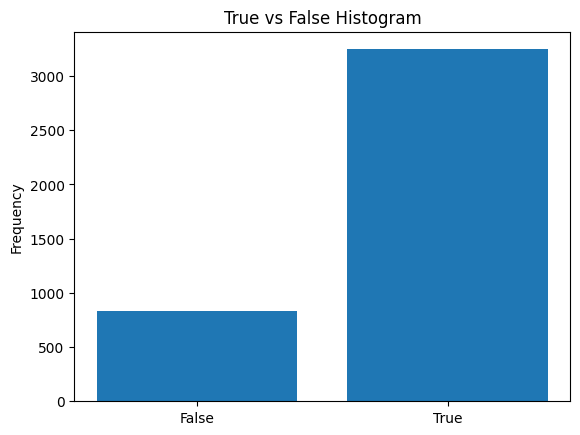

In [4]:
# Conta i valori (False = 0, True = 1)
counts = np.bincount(np.squeeze(y_full, axis=-1))  # Conta quanti 0 (False) e 1 (True) ci sono

# Creazione dell'istogramma
plt.bar([0, 1], counts)
plt.xticks([0, 1], ['False', 'True'])  # Etichette sull'asse x
plt.ylabel('Frequency')
plt.title('True vs False Histogram')

plt.show()

In [5]:
y_squeeze = np.array(y_full).squeeze()
print(len(y_squeeze))
print(y_squeeze)
indici = np.where(y_squeeze == True)
print(len(indici[0]))
print(indici[0])

4080
[ True  True  True ... False False False]
3246
[   0    1    2 ... 4026 4027 4028]


In [6]:
valori_casuali = np.random.choice(indici[0], size=834, replace=False)
print(valori_casuali)

[3023 2438 1272  365 3449 1228 2516 1387 3810 1119  265 3690 1580 3717
  354 2696 2933 2870  537 2228 2016 2055  853  375 2083  515 1204 2703
  531 1193 1631 3009 3010   34  154  212   78 1253  159 1630 2928  315
  670  325 1011  376 1878 3237 2833 1431 3214 3078  211 2361  290  172
  547 2711  224 2962  946 3856 3727  299  758  916 2727 2737 3709 2598
 2551 3699  851 3817 1245  793 1899 3098   17 1521 2187  206 1142 1860
 1456  948  886 1313   36  913 1842 1731  109 1607 2121  122 1803 1020
  580 2033   84 3089  579  235 1827 2827  834  501 3634 1386 2135 2855
  198 1793 2767  659 4013 1919  756 1682 3243 2530 1029  509 2687 2996
 2340  369  490  464 2178  590 2036  530  275 2345 1805 1647 1264 3951
 2444  942  293 2787 3825 3559   30  997  292  494  164 2759 1510 2026
 2475 2572 1745 1173  327 3156 1592 2358 1821 3567 2154 2679 1990  968
  349 1418 2234  671 1763 1719 2018  838 1548   14  339  201 1577 1288
 1452  276 2908  559   48 3122  672 1904 2366 1618 1686 1661 2948  226
 1094 

In [7]:
def plot_image(img, num_images = 30, images_per_row = 10):
    list_numer = list(range(0, img.shape[0]))
    
    # Randomly select image keys
    selected_keys = random.sample(list_numer, num_images)
    
    # Calculate the number of rows needed
    num_rows = int(np.ceil(num_images / images_per_row))
    
    # Create the figure with the appropriate dimensions
    plt.figure(figsize=(20, 4 * num_rows))
    
    for idx, key in enumerate(selected_keys):
        plt.subplot(num_rows, images_per_row, idx + 1)
        
        # Normalizza i valori dell'immagine tra 0 e 1 se non lo sono già
        img_normalized = img[key].astype(float)
        if img_normalized.max() > 1:
            img_normalized = img_normalized / 255.0
            
        plt.imshow(img_normalized, cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
        plt.title(f'Image {idx + 1}')
    
    plt.tight_layout()
    plt.show()

In [8]:
val = np.max(X_mask)
print(val)

val_ = np.min(X_mask)
print(val_)

masked_image = X_segmented * X_mask
X_train = np.repeat(masked_image, 3, axis=-1)

del masked_image

print(X_train.shape)

1.0
0.0
(4080, 512, 512, 3)


In [9]:
del X_segmented
del X_mask
del X_radiomics

In [10]:
X_extracted_true = X_train[valori_casuali]
y_extracted_true = y_full[valori_casuali]

indici_false = np.where(y_squeeze == False)

X_extracted_false = X_train[indici_false[0]]
y_extracted_false = y_full[indici_false[0]]


X_combined = np.concatenate((X_extracted_true, X_extracted_false), axis=0)
del X_extracted_true, X_extracted_false
y_combined = np.concatenate((y_extracted_true, y_extracted_false), axis=0)
del y_extracted_true, y_extracted_false, y_full

# Creare una permutazione casuale degli indici
indices = np.random.permutation(len(y_combined))

# Applicare lo shuffle
X_shuffled = X_combined[indices]
y_shuffled = y_combined[indices]

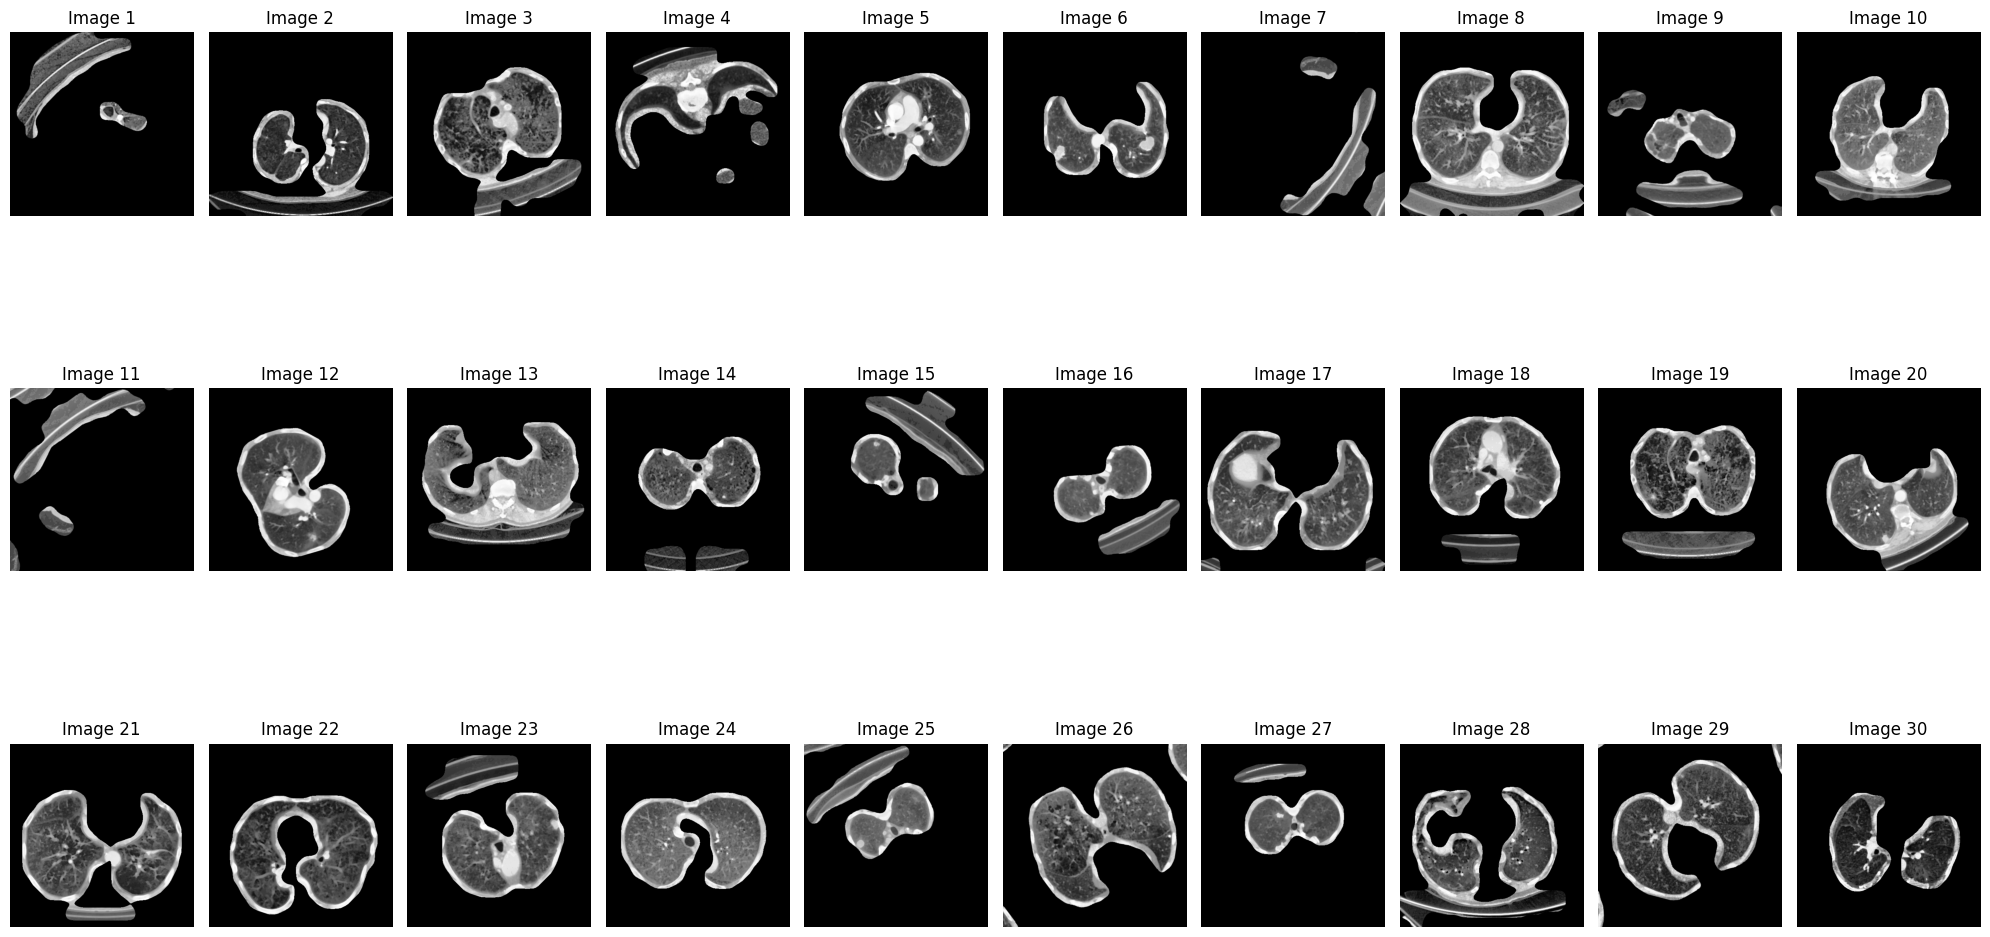

In [11]:
plot_image(X_shuffled)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, stratify=y_shuffled, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1334, 512, 512, 3) (1334, 1)
(334, 512, 512, 3) (334, 1)


In [13]:
batch_size = 16

In [14]:
count_true = np.sum(y_train == True) 
count_false = np.sum(y_train == False)

print(count_true, count_false)

667 667


In [15]:
# Number of training epochs
epochs = 1000

# Learning rate: step size for updating the model's weights
learning_rate = 1e-3

# Print the defined parameters
print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Learning Rare:", learning_rate)

Epochs: 1000
Batch Size: 16
Learning Rare: 0.001


In [16]:
from tensorflow.keras import layers
from tensorflow.keras import layers as tfkl
from tensorflow.keras import optimizers as op
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

def build_model(
    input_shape,
    output_shape,
    learning_rate = learning_rate,
    seed=seed
):


    inputs = tfkl.Input(shape=input_shape, name='Input',  batch_size=1)

    inputs_processed = preprocess_input(inputs)
    
    # Download the ResNet50 Model
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        classes=output_shape,
        classifier_activation='sigmoid',
        input_tensor=inputs_processed
    )


    base_model.trainable = True

    number_layers = len(base_model.layers)
    print("number_layers: ", number_layers)

    non_trainble_layers = int(0.5 * number_layers)
    print("non_trainble_layers: ", non_trainble_layers)

    for layer in base_model.layers[:non_trainble_layers]:
        layer.trainable = False

    for layer in base_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False


    x = layers.GlobalAveragePooling2D(name='gap')(base_model.output)

    # DROPOUT
    # x = tfkl.Dropout(0.3, name='dropout')(x)
    

    # OUTPUT LAYER CLASSIFICATION
    outputs = tfkl.Dense(units=output_shape, name='dense_output', activation = 'sigmoid')(x)


    final_model = tfk.Model(inputs=inputs, outputs=outputs, name='ResNet50')

    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']

    loss = tfk.losses.BinaryCrossentropy()


    final_model.compile(loss=loss, optimizer=optimizer, metrics=metrics)


    return final_model

In [17]:
patience = 20

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

checkpointer = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/checkpoint_ResNet50_downsampling.keras', verbose=1, save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',     # Monitor the loss on the validation set.
    factor=0.5,             # Reduces LR by a factor of 0.5 (halves it).
    patience=5,            # Wait 10 epochs with no improvements before reducing the LR.
    min_delta=1e-4,         # Only consider improvements > 0.0001.
    min_lr=1e-7            # Does not reduce LR below 1e-6.
)

# Store the callback in a list
callbacks = [early_stopping, checkpointer, reduce_lr]

In [18]:
# Train the model with early stopping callback
input_shape = X_train.shape[1:]

# Output shape for the model
output_shape = y_train.shape[1]
print(y_train.shape)

final_model = build_model(input_shape=input_shape, output_shape=output_shape)

(1334, 1)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
number_layers:  175
non_trainble_layers:  87


In [19]:
from tensorflow.keras import utils as ut

final_model.summary(expand_nested=True)

# ut.plot_model(final_model, expand_nested=False, show_trainable=True, show_shapes=True, dpi=60)

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)        │ (1, 512, 512, 3)       │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (1, 512, 512)          │              0 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (1, 512, 512)          │              0 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (1, 512, 512)          │              0 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (1, 512, 512, 3)       │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (1, 512, 512, 3)       │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (1, 518, 518, 3)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (1, 256, 256, 64)      │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (1, 256, 256, 64)      │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (1, 256, 256, 64)      │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (1, 258, 258, 64)      │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (1, 128, 128, 64)      │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (1, 128, 128, 64)      │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (1, 128, 128, 64)      │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (1, 128, 128, 64)      │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (1, 128, 128, 64)      │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 21,322,241 (81.34 MB)

 Non-trainable params: 2,267,520 (8.65 MB)

In [20]:
val = np.max(X_train)
print(val)

val_ = np.min(X_train)
print(val_)

255.0
0.0


In [21]:
history = final_model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.3,
    callbacks=callbacks
).history

Epoch 1/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.5382 - loss: 4.7042
Epoch 1: val_loss improved from inf to 0.69538, saving model to /kaggle/working/checkpoint_ResNet50_downsampling.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 52s 516ms/step - accuracy: 0.5379 - loss: 4.6602 - val_accuracy: 0.5262 - val_loss: 0.6954 - learning_rate: 0.0010
Epoch 2/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.4963 - loss: 0.7071
Epoch 2: val_loss improved from 0.69538 to 0.68335, saving model to /kaggle/working/checkpoint_ResNet50_downsampling.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 255ms/step - accuracy: 0.4965 - loss: 0.7072 - val_accuracy: 0.5262 - val_loss: 0.6833 - learning_rate: 0.0010
Epoch 3/1000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5226 - loss: 0.7034
Epoch 3: val_loss improved from 0.68335 to 0.68249, saving model to /kaggle/working/checkpoint_ResNet50_downsampling.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 256ms/step - accuracy: 0.5230 - loss: 0.7033 - val_accur

In [22]:
# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

import datetime
now = datetime.datetime.now()

# Format as Day-Month-HH:min
date_time_str = now.strftime("%d-%m-%H:%M")


model_filename = './ResNet50_full_accuracy_downsampling_'+str(final_val_accuracy)+'_'+date_time_str+'.keras'
final_model.save(model_filename)

Final validation accuracy: 65.09%


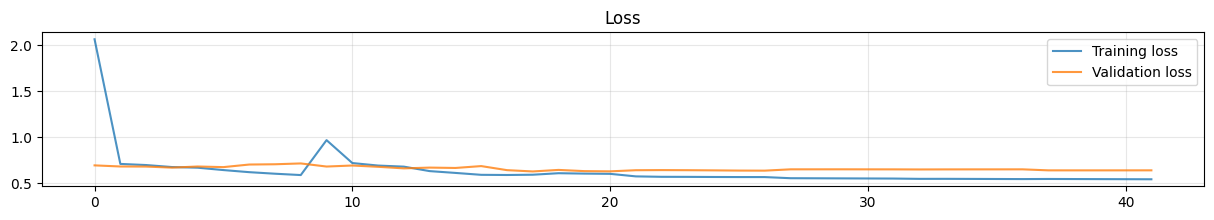

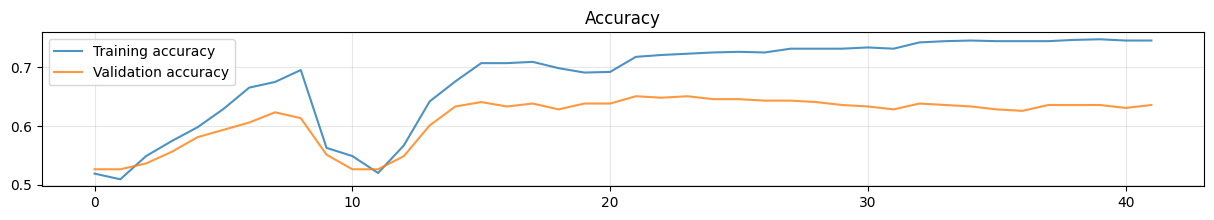

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [30]:
# Predict labels for the entire test set
predictions = final_model.predict(X_test, verbose=0)

# Display the shape of the predictions
print("Predictions Shape:", predictions.shape)

Predictions Shape: (334, 1)


In [25]:
predictions = predictions >= 0.5

Accuracy score over the test set: 0.6707
Precision score over the test set: 0.6715
Recall score over the test set: 0.6707
F1 score over the test set: 0.6702


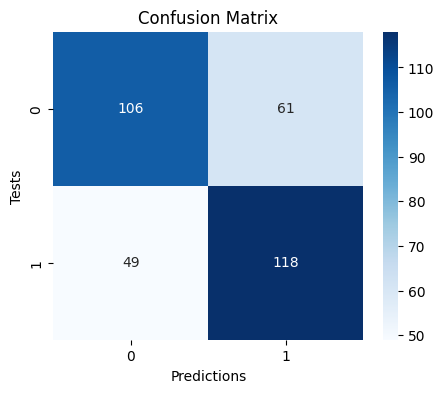

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec

# Calculate and display test set accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy score over the test set: {round(accuracy, 4)}')

# Calculate and display test set precision
precision = precision_score(y_test, predictions, average='weighted')
print(f'Precision score over the test set: {round(precision, 4)}')

# Calculate and display test set recall
recall = recall_score(y_test, predictions, average='weighted')
print(f'Recall score over the test set: {round(recall, 4)}')

# Calculate and display test set F1 score
f1 = f1_score(y_test, predictions, average='weighted')
print(f'F1 score over the test set: {round(f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Combine numbers and percentages into a single string for annotation
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Tests')
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import seaborn as sns

import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def plot_roc_curve(model, X_test, y_test, title="ROC Curve"):
    
    y_pred_proba = model.predict(X_test)

    y_pred_proba = y_pred_proba[:, 0]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    sns.set_style("whitegrid")
    
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
             label='Random classifier')
    
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    
    return roc_auc

def analyze_thresholds(model, X_test, y_test, n_thresholds=10):
    
    y_pred_proba = model.predict(X_test)

    y_pred_proba = y_pred_proba[:, 0]
    
    thresholds = np.linspace(0.1, 0.9, n_thresholds)
    
    results = []
    for threshold in thresholds:
        
        y_pred = (y_pred_proba >= threshold).astype(int)
        
       
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'accuracy':  accuracy
        })
    
    return pd.DataFrame(results)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step


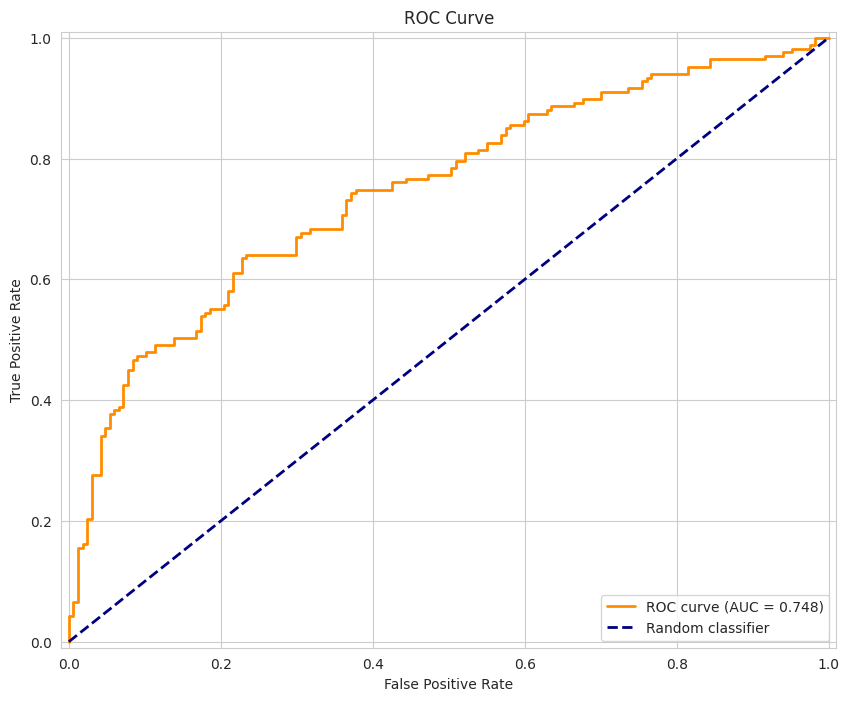


Auc_score: 0.7477500089641078
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step

Threshold analysis:
   threshold  precision    recall  f1_score  accuracy
0   0.100000   0.500000  1.000000  0.666667  0.500000
1   0.188889   0.500000  1.000000  0.666667  0.500000
2   0.277778   0.522727  0.964072  0.677895  0.541916
3   0.366667   0.584000  0.874251  0.700240  0.625749
4   0.455556   0.639594  0.754491  0.692308  0.664671
5   0.544444   0.681529  0.640719  0.660494  0.670659
6   0.633333   0.730769  0.568862  0.639731  0.679641
7   0.722222   0.816327  0.479042  0.603774  0.685629
8   0.811111   0.878788  0.347305  0.497854  0.649701
9   0.900000   0.885714  0.185629  0.306931  0.580838


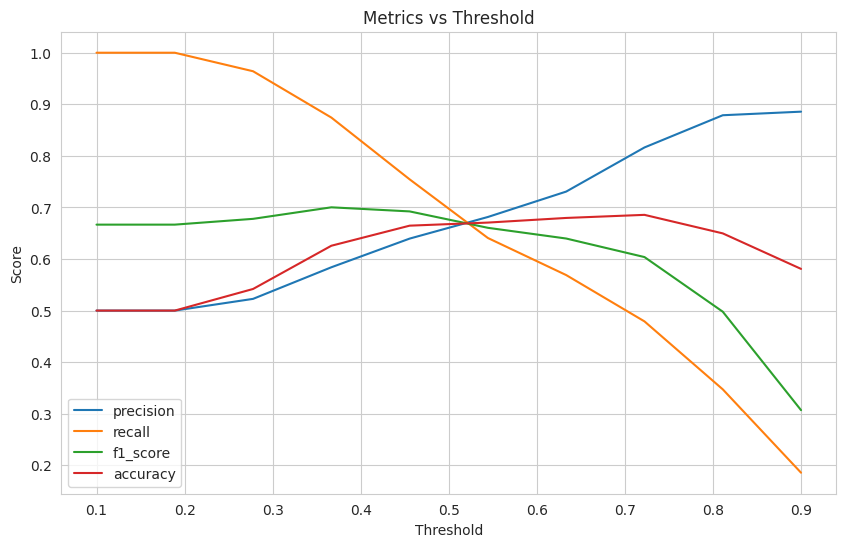

In [29]:

auc_score = plot_roc_curve(final_model, X_test, y_test)
plt.show()

print("\nAuc_score:", auc_score)
    

threshold_analysis = analyze_thresholds(final_model, X_test, y_test)
print("\nThreshold analysis:")
print(threshold_analysis)
    

plt.figure(figsize=(10, 6))
for metric in ['precision', 'recall', 'f1_score', 'accuracy']:
    plt.plot(threshold_analysis['threshold'], 
                threshold_analysis[metric], 
                label=metric)
    
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs Threshold')
plt.legend()
plt.grid(True)
plt.show()